<a href="https://colab.research.google.com/github/suji2804/ai-engineer-roadmap/blob/main/Week4%20-%20Unsupervised/mall_customers_Kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [27]:
df = pd.read_csv('Mall_Customers.csv')

In [28]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [29]:
df.drop('CustomerID', axis=1, inplace=True)
#drop gender
df.drop('Gender', axis=1, inplace=True)

In [30]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


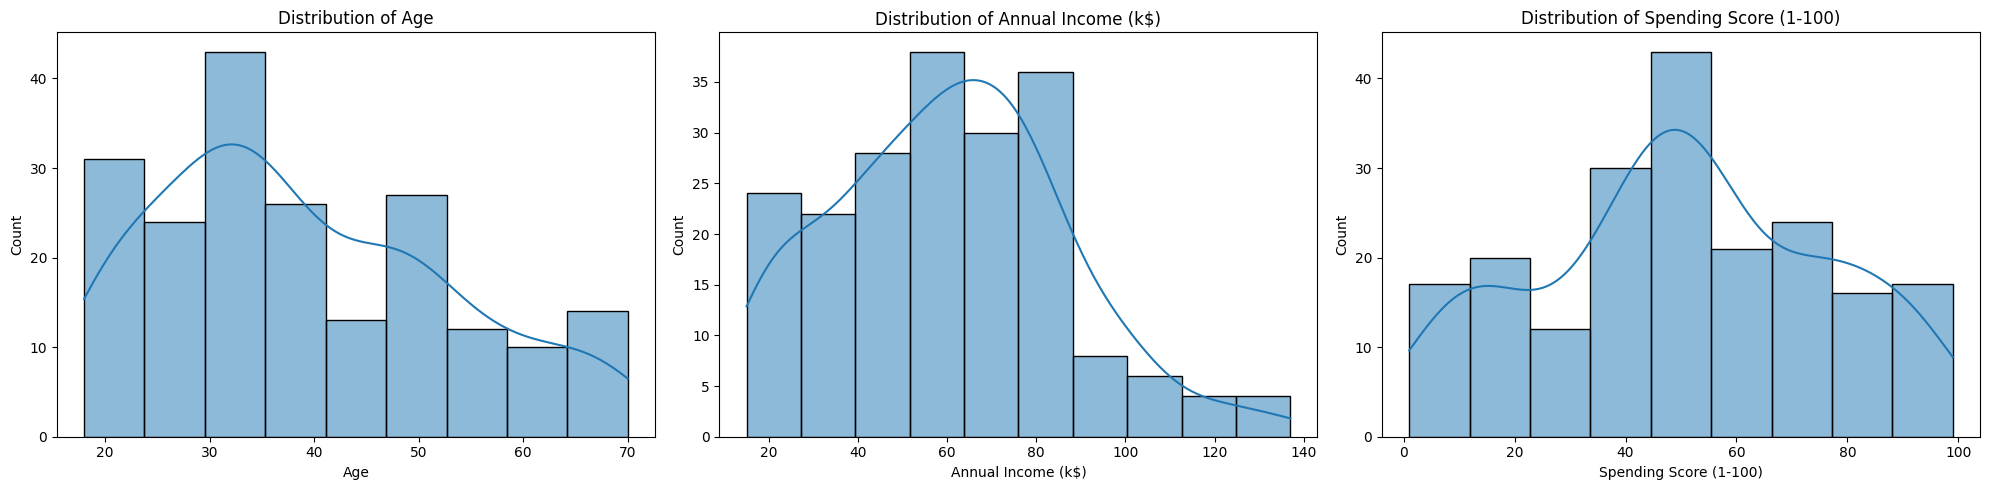

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [18]:
from sklearn.preprocessing import StandardScaler

# Optional encoding
# df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df[features])

# # Convert back to DataFrame
# import numpy as np
# df_scaled = pd.DataFrame(df_scaled, columns=features)
# df_scaled

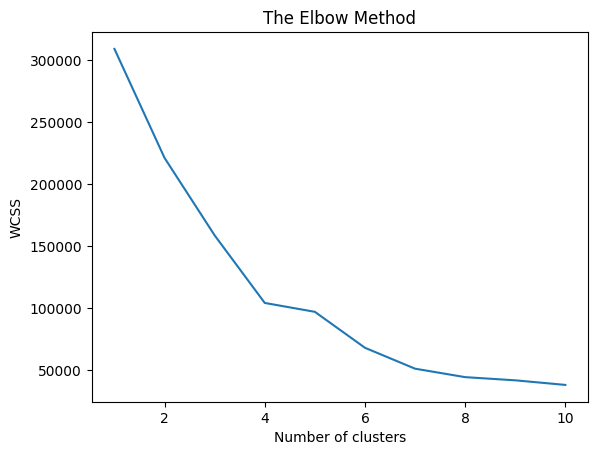

In [32]:
#determine the best number of clusters using the Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
#plot the graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [33]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)


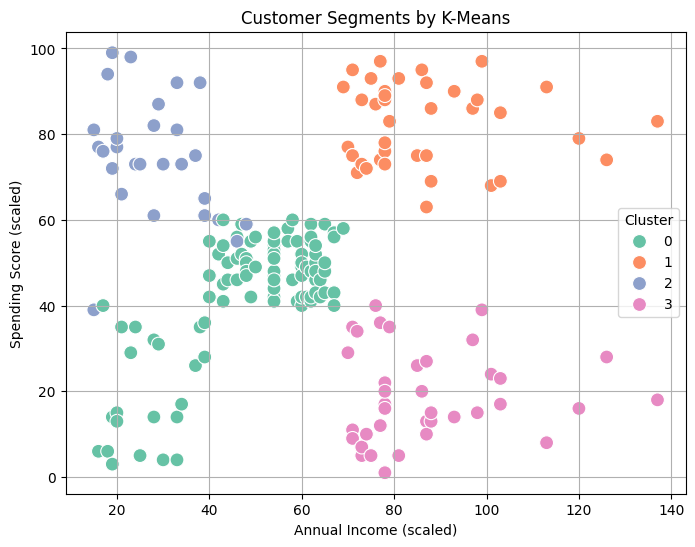

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='Set2',
    s=100
)
plt.title('Customer Segments by K-Means')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df.drop('Cluster', axis=1))

pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']


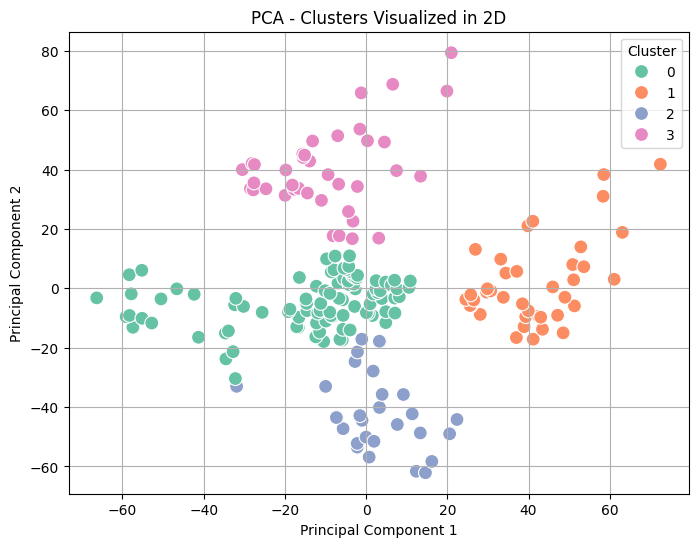

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
plt.title('PCA - Clusters Visualized in 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
